In [221]:
import numpy as np
import matplotlib.pyplot as plt

In [222]:
"""
k-mean algorithm
step 1: decide the number of clusters
step 2: initialize the centers of the clusters
step 3: clustering
step 4: re-calculate the new centers
--- repeat step 3-4 until new centers == old centers
"""

'\nk-mean algorithm\nstep 1: decide the number of clusters\nstep 2: initialize the centers of the clusters\nstep 3: clustering\nstep 4: re-calculate the new centers\n--- repeat step 3-4 until new centers == old centers\n'

In [223]:
means = [[1, 2], [4, 8], [9, 0]]
cov = [[1,0],[0,1]]
cluster_0 = np.random.multivariate_normal(means[0], cov, 1000)
cluster_1 = np.random.multivariate_normal(means[1], cov, 10)
cluster_2 = np.random.multivariate_normal(means[2], cov, 1000)
all_data = np.concatenate((cluster_0, cluster_1, cluster_2))
labels = []

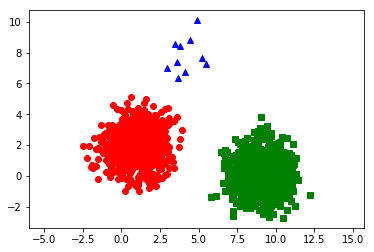

In [224]:
# plot data
def plot_data(c0, c1, c2):
    plt.plot(c0[:,0],c0[:,1],'o',color='red')
    plt.plot(c1[:,0],c1[:,1],'^b',color='blue')
    plt.plot(c2[:,0],c2[:,1],'rs',color='green')
    plt.axis('equal')
    plt.show()
    
plot_data(cluster_0, cluster_1, cluster_2)

In [225]:
# step 1: number of cluster --> num
K = 3

In [226]:
# step 2: initialize the centers of the clusters
def initialize_centers(data, num):
    indexs = np.random.choice(data.shape[0], num)
    return data[indexs]

In [227]:
# step 3: clustering -> get value for labels
from scipy.spatial import distance
def clustering(data, centers):
    dist = distance.cdist(data, centers)
    return np.argmin(dist, axis=1)

In [228]:
# step 4: re-calculate the new centers
def calculate_new_centers(data, labels, num):
    new_centers = np.zeros((3,2))
    for i in range(0,num):
        center = np.mean(data[labels == i,:], axis=0)
        new_centers[i,:] = center
    return new_centers

In [229]:
def plot_result(data, labels):
    plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow')

[[1.76655863 2.70790322]
 [8.99112765 0.03057145]
 [0.46442686 1.50795133]]


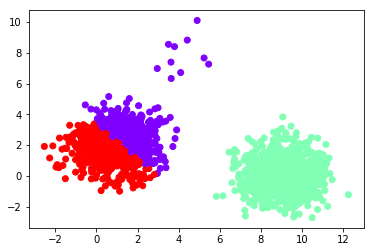

In [230]:
def kmean(data, num):
    centers = initialize_centers(data, num)
    labels = clustering(data, centers)
    new_centers = calculate_new_centers(data, labels, num)
    while True:
        labels = clustering(data, centers)
        new_centers = calculate_new_centers(data, labels, num)
        if ((new_centers == centers).all()):
            break
        else:
            centers = new_centers
    return centers, labels

centers, labels =  kmean(all_data, K)
print(centers)
plot_result(all_data, labels)

In [231]:
x = np.linspace(0,12,1000)
y = np.random.rand(1000,)+4
cluster_0_1 = np.vstack((x,y)).T
all_data_01 = np.concatenate((cluster_0_1, cluster_1, cluster_2))

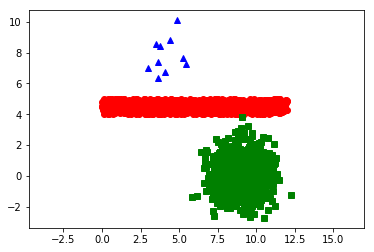

In [232]:
plot_data(cluster_0_1, cluster_1, cluster_2)

[[ 3.03738834  4.57250158]
 [ 9.02436956  4.40890686]
 [ 8.98860508 -0.0327337 ]]


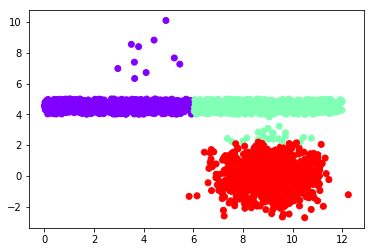

In [233]:
centers_01, labels_01 =  kmean(all_data_01, K)
print(centers_01)
plot_result(all_data_01, labels_01)

In [ ]:
"""
Reference:
https://www.kdnuggets.com/2015/01/data-science-102-kmeans-clustering-not-free-lunch.html
https://www.kdnuggets.com/2017/03/naive-sharding-centroid-initialization-method.html
"""